# Task 2
Suponiendo que es simple generar variables aleatorias con función de probabilidad acumulada Fi(x) para i de 1 a n, tenemos la variable aleatoria V con una función de probabilidad acumulada:

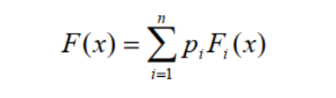

Donde pi constituye una distribución probabilística
1. Describa un algoritmo para generar V
2. Demuestre que el algoritmo genera adecuadamente V

### Algoritmo para generar \( $V$ \):

1. **Entradas**:
   - **Distribuciones acumuladas**: Conjunto de funciones de distribución acumulada \( $F_i(x)$ \), como una función que genera valores uniformes, otra que genera valores según una distribución normal, etc.
   - **Probabilidades**: Conunto de probabilidades \( $p_i$ \) asociadas a cada una de estas distribuciones. Estas probabilidades suman 1.

2. **Proceso**:
   - Genera un número aleatorio \( $U$ \) entre 0 y 1.
   - Usa \( $U$ \) para decidir cuál de las distribuciones \( $F_i(x)$ \) vas a usar. Se suman las probabilidades \( $p_i$ \) hasta que encuentres la que corresponde a \( $U$ \).
   - Una vez decidida la distribución a usar, genera un valor usando esa distribución.

3. **Salida**:
   - Variable aleatoria \( $V$ \).


Probabilidades originales:  [0.2, 0.5, 0.3]
Proporciones empíricas:     [0.1955, 0.4976, 0.3069]


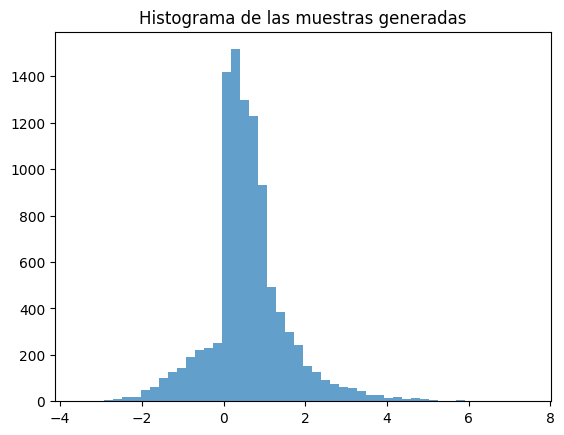

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Algoritmo para generar V
def generar_V(F_list, p_list):
    U = np.random.uniform(0, 1)
    suma_acumulada = 0
    j = 0
    
    for i, p in enumerate(p_list):
        suma_acumulada += p
        if U <= suma_acumulada:
            j = i
            break
    
    V = F_list[j]()
    return V, j

# Funciones de distribución acumulada
def F1():
    return np.random.uniform(0, 1)

def F2():
    return np.random.exponential(1)

def F3():
    return np.random.normal(0, 1)

# Probabilidades p1, p2, p3
p_list = [0.2, 0.5, 0.3]

# Lista de funciones de distribución acumulada
F_list = [F1, F2, F3]

# Generar muestras para verificar la distribución empírica
n_muestras = 10000
muestras = []
frecuencia = [0] * len(p_list)

for _ in range(n_muestras):
    V, j = generar_V(F_list, p_list)
    muestras.append(V)
    frecuencia[j] += 1

# Convertir frecuencias en proporciones
proporciones = [f / n_muestras for f in frecuencia]

# Mostrar las proporciones comparadas
print("Probabilidades originales: ", p_list)
print("Proporciones empíricas:    ", proporciones)

# Graficar los histogramas de las distribuciones generadas
plt.hist([generar_V(F_list, p_list)[0] for _ in range(n_muestras)], bins=50, alpha=0.7)
plt.title('Histograma de las muestras generadas')
plt.show()


In [1]:
import numpy as np

capital_cost_rate = 0.1
iterations_list = [100, 1000, 10000]

In [2]:
def calculate_vpn(flows, discount_rate):
    return np.sum(flows / (1 + discount_rate) ** np.arange(len(flows)))

In [3]:
def simulate_hotel_project(iterations):
    vpns = []
    for _ in range(iterations):
        flows = np.array([
            -800,
            np.random.normal(-800, 50),
            np.random.normal(-800, 100),
            np.random.normal(-700, 150),
            np.random.normal(300, 200),
            np.random.normal(400, 200),
            np.random.normal(500, 200),
            np.random.uniform(200, 8440)
        ])
        vpn = calculate_vpn(flows, capital_cost_rate)
        vpns.append(vpn)
    return vpns

In [4]:
def simulate_commercial_project(iterations):
    vpns = []
    for _ in range(iterations):
        flows = np.array([
            -900,
            np.random.normal(-600, 50),
            np.random.normal(-200, 50),
            np.random.normal(-600, 100),
            np.random.normal(250, 150),
            np.random.normal(350, 150),
            np.random.normal(400, 150),
            np.random.uniform(1600, 6000)
        ])
        vpn = calculate_vpn(flows, capital_cost_rate)
        vpns.append(vpn)
    return vpns

In [5]:
for iterations in iterations_list:
    hotel_vpns = simulate_hotel_project(iterations)
    commercial_vpns = simulate_commercial_project(iterations)
    
    print(f"\nResultados para {iterations} iteraciones:")
    print(f"Proyecto Hotel: VPN medio = {np.mean(hotel_vpns):.2f}, Desviación estándar = {np.std(hotel_vpns):.2f}")
    print(f"Proyecto Centro Comercial: VPN medio = {np.mean(commercial_vpns):.2f}, Desviación estándar = {np.std(commercial_vpns):.2f}")
    
    if np.mean(hotel_vpns) > np.mean(commercial_vpns):
        print("El Proyecto Hotel es más rentable.")
    else:
        print("El Proyecto Centro Comercial es más rentable.")


Resultados para 100 iteraciones:
Proyecto Hotel: VPN medio = 119.79, Desviación estándar = 1338.49
Proyecto Centro Comercial: VPN medio = 501.29, Desviación estándar = 757.56
El Proyecto Centro Comercial es más rentable.

Resultados para 1000 iteraciones:
Proyecto Hotel: VPN medio = 149.16, Desviación estándar = 1237.53
Proyecto Centro Comercial: VPN medio = 516.28, Desviación estándar = 681.91
El Proyecto Centro Comercial es más rentable.

Resultados para 10000 iteraciones:
Proyecto Hotel: VPN medio = 264.16, Desviación estándar = 1244.19
Proyecto Centro Comercial: VPN medio = 509.26, Desviación estándar = 679.19
El Proyecto Centro Comercial es más rentable.


En general el proyecto de centro comercial es más rentable.